In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = r'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [5]:
path

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/02 Data/Prepared Data'

In [6]:
# Import most updated data

df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))

/var/folders/z2/5vq5z7g94w536gb5fb2v7sv40000gn/T/ipykernel_17518/2740001317.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'AB_US_2020_clean.csv'))


In [7]:
#check for mix type values
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

name
neighbourhood_group
last_review


In [8]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [9]:
# fix mix type value columns

df['name'] = df['name'].astype('str')
df['neighbourhood_group'] = df['neighbourhood_group'].astype('str')
df['last_review'] = df['last_review'].astype('str')

In [10]:
df.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [11]:
#check for mix type values
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
    
#no mix types values!

In [12]:
# drop Unnamed column

df = df.drop(columns = ['Unnamed: 0'])

In [13]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,nan,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,nan,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,nan,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,nan,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,nan,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


# Exploring Relationships

In [14]:
# Create a correlation matrix using pandas

df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.537812,-0.057875,-0.010406,0.021400,-0.001617,-0.381549,0.061313,0.162187,0.051100
host_id,0.537812,1.000000,-0.049197,0.009212,0.019818,-0.002003,-0.188811,0.064491,0.103270,0.086512
latitude,-0.057875,-0.049197,1.000000,0.579913,-0.054397,0.000647,0.047353,0.047339,-0.182688,-0.177597
longitude,-0.010406,0.009212,0.579913,1.000000,-0.057780,-0.001541,-0.034381,-0.019222,-0.168422,-0.145708
price,0.021400,0.019818,-0.054397,-0.057780,1.000000,-0.000560,-0.072522,-0.036940,0.043074,0.035139
minimum_nights,-0.001617,-0.002003,0.000647,-0.001541,-0.000560,1.000000,-0.000886,-0.001790,-0.000638,-0.002381
number_of_reviews,-0.381549,-0.188811,0.047353,-0.034381,-0.072522,-0.000886,1.000000,0.702132,-0.119576,0.052081
reviews_per_month,0.061313,0.064491,0.047339,-0.019222,-0.036940,-0.001790,0.702132,1.000000,-0.065488,0.037794
calculated_host_listings_count,0.162187,0.103270,-0.182688,-0.168422,0.043074,-0.000638,-0.119576,-0.065488,1.000000,0.162445
availability_365,0.051100,0.086512,-0.177597,-0.145708,0.035139,-0.002381,0.052081,0.037794,0.162445,1.000000


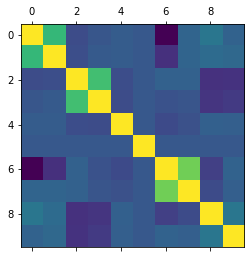

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

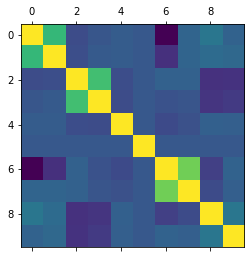

In [16]:
# Save figure
plt.matshow(df.corr())
#plt.savefig("out.png") 

# This will save the image in the working directory. 
#If you don't know what this directory is the next line will show you how to check

In [17]:
#current dir
cwd = os.getcwd()
cwd

'/Users/Chloe/Documents/2. CareerFoundry/2. Data Immersion pt 1/Achievement 6/Final Data Project/03 Scripts'

Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 576x576 with 0 Axes>

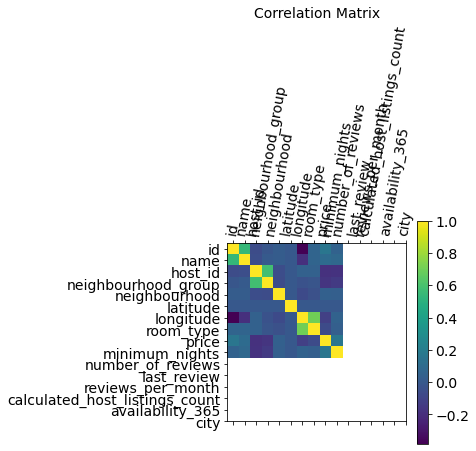

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr())# type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=80) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Create a correlation heat map using seaborn:

In [19]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city'],
      dtype='object')

In [20]:
# Create a subset excluding the "Date" and "No" columns

sub = df[['latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [21]:
sub

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,35.651460,-82.627920,60,1,138,1.14000,1,0
1,35.597790,-82.555400,470,1,114,1.03000,11,288
2,35.606700,-82.555630,75,30,89,0.81000,2,298
3,35.578640,-82.595780,90,1,267,2.39000,5,0
4,35.614420,-82.541270,125,30,58,0.52000,1,0
...,...,...,...,...,...,...,...,...
226025,38.903880,-77.029730,104,1,0,1.43145,2,99
226026,38.920820,-76.990980,151,2,0,1.43145,1,300
226027,38.911170,-77.033540,240,2,0,1.43145,1,173
226028,38.926630,-77.044360,60,21,0,1.43145,5,362


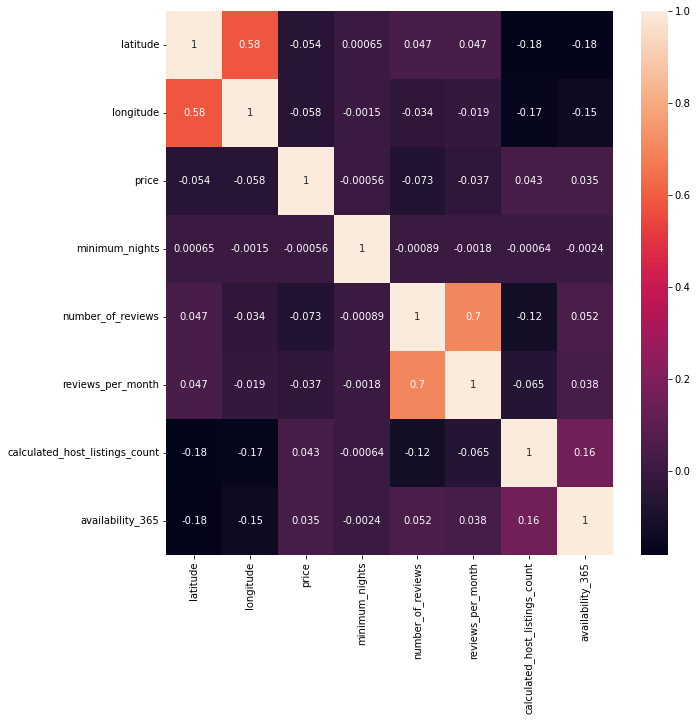

In [22]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [24]:
sub.corr = 'corr_heatmap.png'
#print
plt.savefig(sub.corr)

<Figure size 432x288 with 0 Axes>

The strongest correlation shown by the heat map is +.7 between the variables 'number_of_reviews' and 'reviews_per_month' which makes sense and suggests consistency within the data set. The other notable correlation is at +.58 between longitude and latitude. This could be worth further investigation.

# Scatterplots

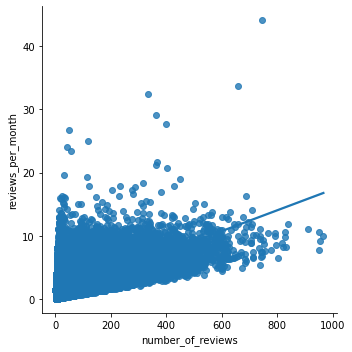

In [24]:
# Create a scatterplot in seaborn

sns.lmplot(x = 'number_of_reviews', y = 'reviews_per_month', data = df)

The scatterplot above shows a strong positive correlation between reviews_per_month and number_of_reviews

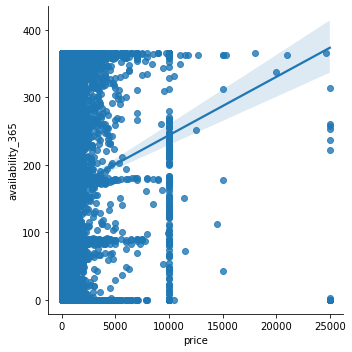

In [25]:
# Create a scatterplot in seaborn

sns.lmplot(x = 'price', y = 'availability_365', data = df)

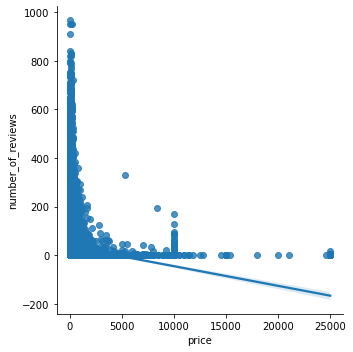

In [26]:
# Create a scatterplot in seaborn

sns.lmplot(x = 'price', y = 'number_of_reviews', data = df)

# Pair Plots

In [27]:
# Keep only the variables you want to use in the pair plot

#sub_2 = sub[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']]

In [28]:
# Create a pair plot 

#g = sns.pairplot(sub_2)

# Categorical Plots

<AxesSubplot:xlabel='price', ylabel='Count'>

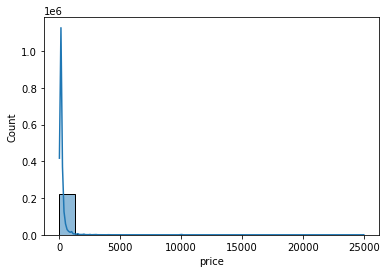

In [29]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['price'], bins = 20, kde = True)

<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

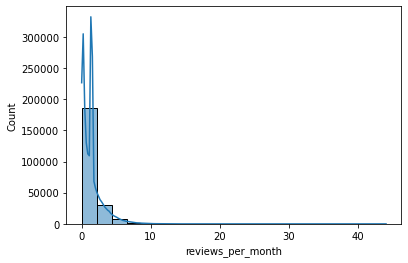

In [30]:
sns.histplot(df['reviews_per_month'], bins = 20, kde = True)

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

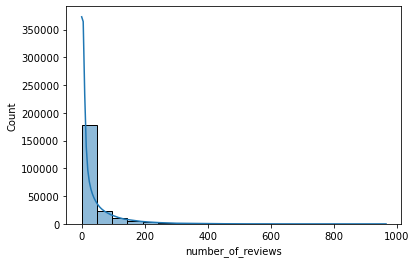

In [31]:
sns.histplot(df['number_of_reviews'], bins = 20, kde = True)

In [32]:
df.loc[df['number_of_reviews'] < 50, 'Reviews category'] = 'Low in reviews'

In [33]:
df.loc[(df['number_of_reviews'] >= 50) & (df['number_of_reviews'] < 100), 'Reviews category'] = 'Averagely reviewed'

In [35]:
df.loc[df['number_of_reviews'] >= 100, 'Reviews category'] = 'Highly reviewed'

In [36]:
df['Reviews category'].value_counts(dropna = False)

Low in reviews        178505
Averagely reviewed     23776
Highly reviewed        23749
Name: Reviews category, dtype: int64

In [37]:
178505+23776+23749

226030

In [38]:
df.shape

(226030, 18)

In [39]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'city',
       'Reviews category', 'Review category'],
      dtype='object')

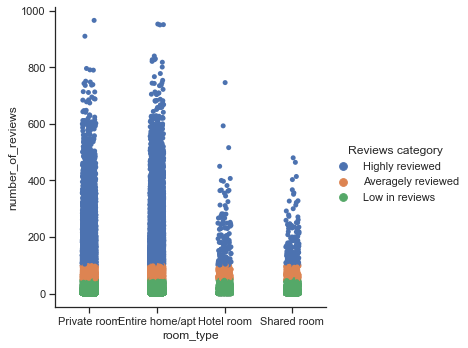

In [46]:
# Create a categorical plot in seaborn using the reviews categories created above

sns.set(style="ticks")
g = sns.catplot(x="room_type", y="number_of_reviews", hue="Reviews category", data=df)

In [47]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 